# Data Visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import pycountry
import plotly.express as px
import warnings; 
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('cleaned/cleaned_data.csv')

In [5]:
df.head(10)

,ResponseId,Age,EdLevel,YearsCode,YearsCodePro,WorkExp,Country,JobSat,MainBranch,Employment,...,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AIThreat,AIEthics,AIChallenges
0,73,18-24 years old,"Secondary school (e.g. American high school, G...",3,1,3.0,Pakistan,10.0,I am a developer by profession,"Employed, full-time;Student, full-time;Indepen...",...,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks",Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,NaN,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a..."
1,368,65 years or older,Some college/university study without earning ...,15,9,0.0,United States of America,7.0,"I am not primarily a developer, but I write co...","Independent contractor, freelancer, or self-em...",...,Indifferent,Increase productivity,Somewhat distrust,Very poor at handling complex tasks,Writing code,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers
2,375,25-34 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",12,6,0.0,Austria,7.0,"I am not primarily a developer, but I write co...","Employed, full-time",...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown
3,378,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11,11,0.0,Brazil,7.0,I am a developer by profession,"Employed, full-time",...,Favorable,Increase productivity,Neither trust nor distrust,Neither good or bad at handling complex tasks,Search for answers,NaN,NaN,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a..."
4,380,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,6,7.0,Turkey,10.0,I am a developer by profession,"Employed, full-time",...,Very favorable,Increase productivity;Greater efficiency,Somewhat trust,Bad at handling complex tasks,Writing code;Documenting code;Debugging and ge...,Learning about a codebase,Project planning;Committing and reviewing code...,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;Lack of exec...
5,386,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,17,0.0,France,7.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown
6,387,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22,22,14.0,France,7.0,I am a developer by profession,"Employed, full-time",...,Very favorable,Increase productivity;Speed up learning,Somewhat trust,Neither good or bad at handling complex tasks,Writing code;Documenting code;Testing code;Com...,NaN,NaN,No,Unknown,Don’t trust the output or answers
7,390,25-34 years old,Some college/university study without earning ...,7,7,8.0,United States of America,10.0,I am a developer by profession,"Employed, full-time;Student, part-time",...,Very favorable,Increase productivity;Greater efficiency;Speed...,Neither trust nor distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,Testing code;Committing and reviewing code,Project planning;Deployment and monitoring;Pre...,No,Circulating misinformation or disinformation;E...,"AI tools lack context of codebase, internal a..."
8,393,35-44 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",32,18,18.0,United Kingdom of Great Britain and Northern I...,7.0,I am a developer by profession,"Employed, full-time",...,Unfavorable,Improve accuracy in coding,Somewhat distrust,Bad at handling complex tasks,Writing code,Predictive analytics,Learning about a codebase;Project planning;Doc...,No,Missing or incorrect attribution for sources o...,Don’t trust the output or answers;AI tools lac...
9,396,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",32,

In [6]:
df.isnull().sum()

ResponseId                           0
Age                                  0
EdLevel                              0
YearsCode                            0
YearsCodePro                         0
WorkExp                              0
Country                              0
JobSat                               0
MainBranch                           0
Employment                           0
RemoteWork                           0
CompTotalUSD                         0
DevType                              0
LanguageHaveWorkedWith               0
LanguageWantToWorkWith               0
PlatformHaveWorkedWith               0
PlatformWantToWorkWith               0
OrgSize                              0
PurchaseInfluence                    0
BuyNewTool                           0
TimeSearching                        0
TimeAnswering                        0
AISelect                             0
AISent                               0
AIBen                                0
AIAcc                    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41372 entries, 0 to 41371
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ResponseId                     41372 non-null  int64  
 1   Age                            41372 non-null  object 
 2   EdLevel                        41372 non-null  object 
 3   YearsCode                      41372 non-null  object 
 4   YearsCodePro                   41372 non-null  object 
 5   WorkExp                        41372 non-null  float64
 6   Country                        41372 non-null  object 
 7   JobSat                         41372 non-null  float64
 8   MainBranch                     41372 non-null  object 
 9   Employment                     41372 non-null  object 
 10  RemoteWork                     41372 non-null  object 
 11  CompTotalUSD                   41372 non-null  int64  
 12  DevType                        41372 non-null 

## 1. Age

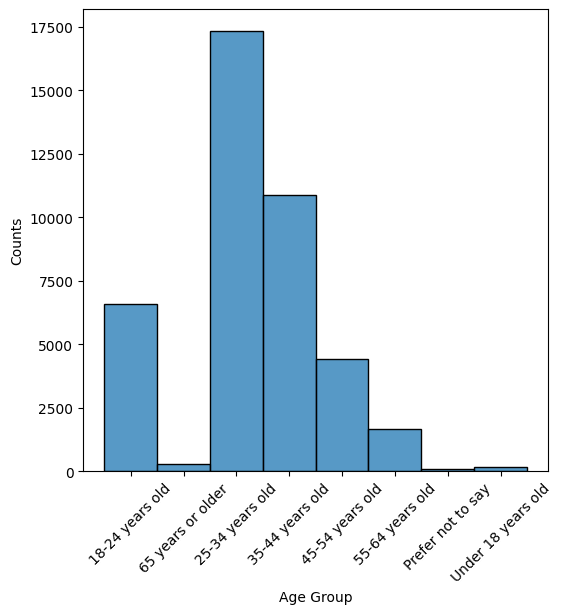

In [8]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Age')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

## 2. Education Level

In [9]:
df['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [10]:
# Define a dictionary to map the original values to shorter ones
edlevel_mapping = {
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary School',
    'Some college/university study without earning a degree': 'Some College',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional Degree',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s Degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s Degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Something else': 'Other',
    'Primary/elementary school': 'Primary School'
}

# Replace the values in the 'EdLevel' column using the mapping
df['EdLevel'] = df['EdLevel'].replace(edlevel_mapping)

# Now the 'EdLevel' column has the shortened values

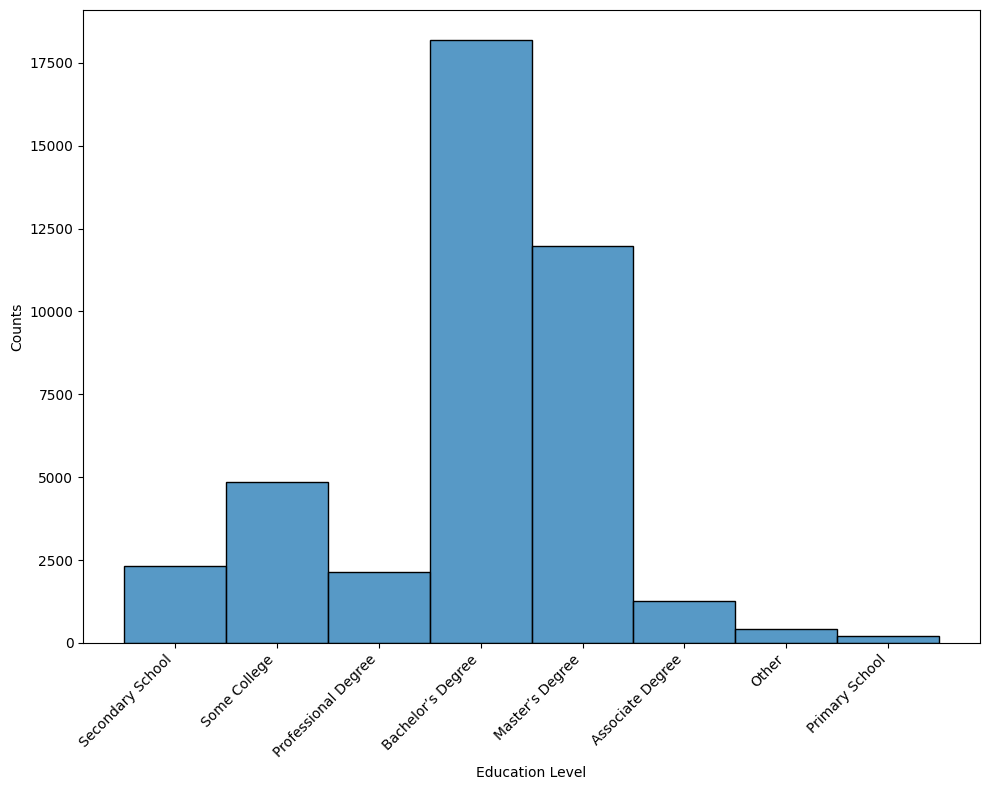

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='EdLevel')

# Rotate x-axis labels to 45 degrees
plt.xticks(rotation=45, ha='right')

plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.tight_layout()  # Ensures everything fits within the figure
plt.show()

## 3. Years of Coding Experience

### Including Education

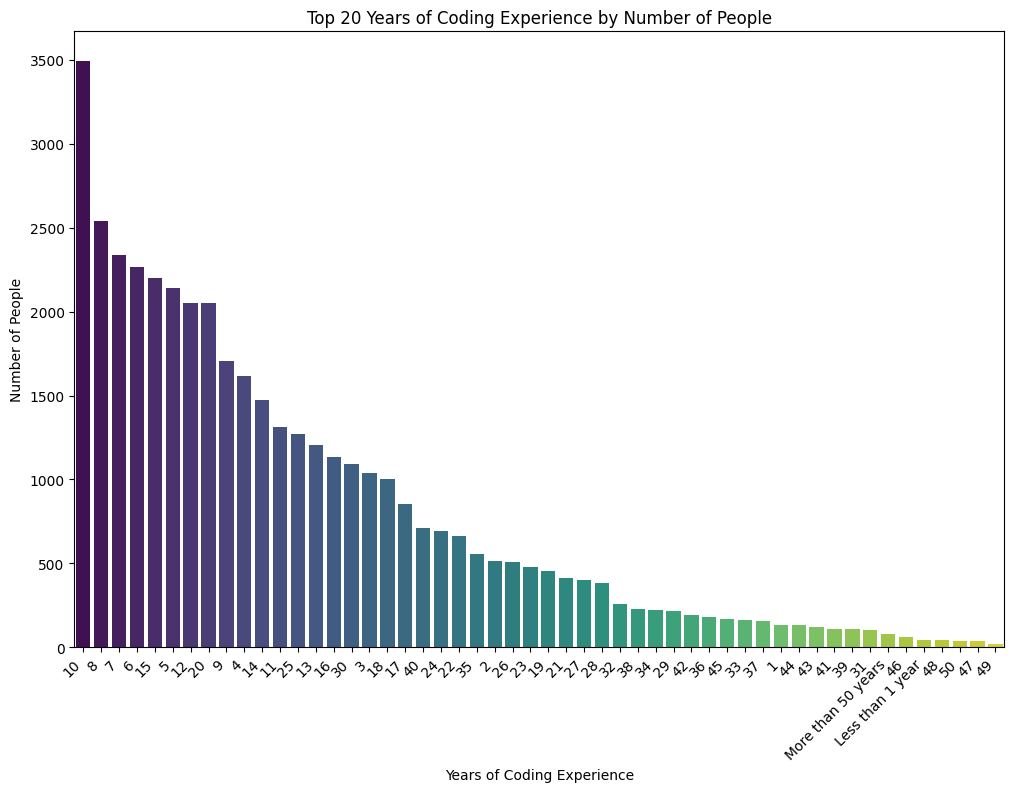

In [12]:
# Count the occurrences of each unique value in 'YearsCode' and sort them in descending order
years_code_counts = df['YearsCode'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 values in decreasing order
sns.barplot(x=years_code_counts.index, y=years_code_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Years of Coding Experience')
plt.ylabel('Number of People')
plt.title('Top 20 Years of Coding Experience by Number of People')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

### Professional Experience (Without Education)

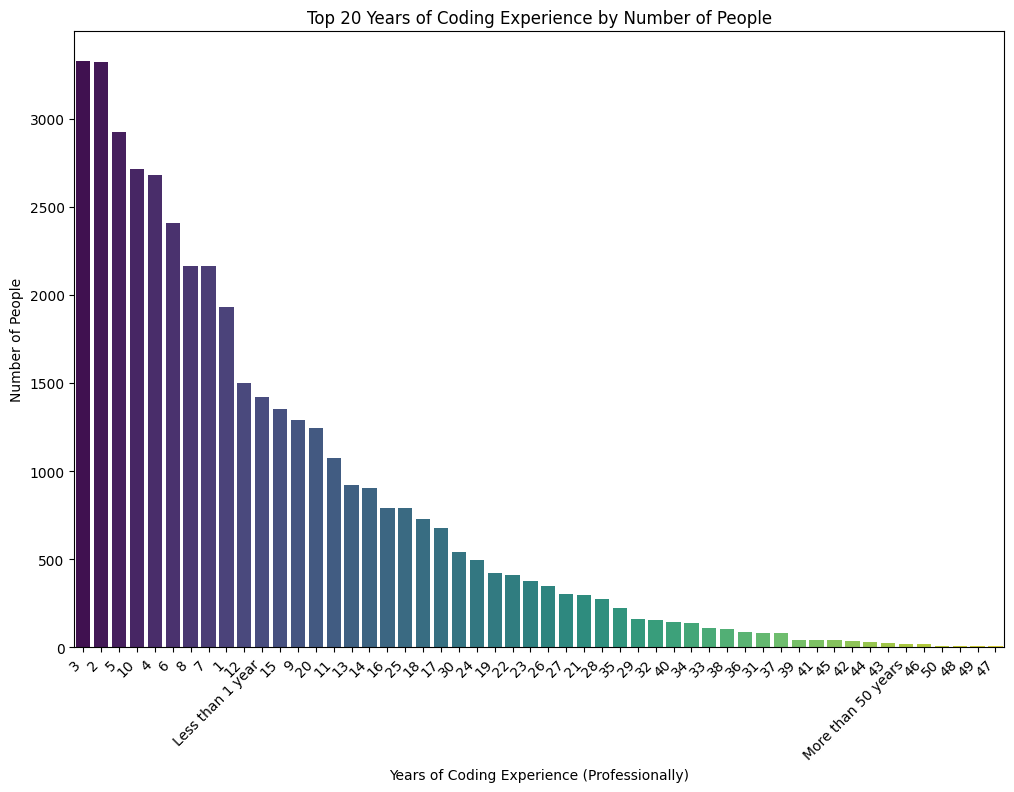

In [13]:
# Count the occurrences of each unique value in 'YearsCode' and sort them in descending order
years_code_counts = df['YearsCodePro'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 values in decreasing order
sns.barplot(x=years_code_counts.index, y=years_code_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Years of Coding Experience (Professionally)')
plt.ylabel('Number of People')
plt.title('Top 20 Years of Coding Experience by Number of People')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

### Work Experience

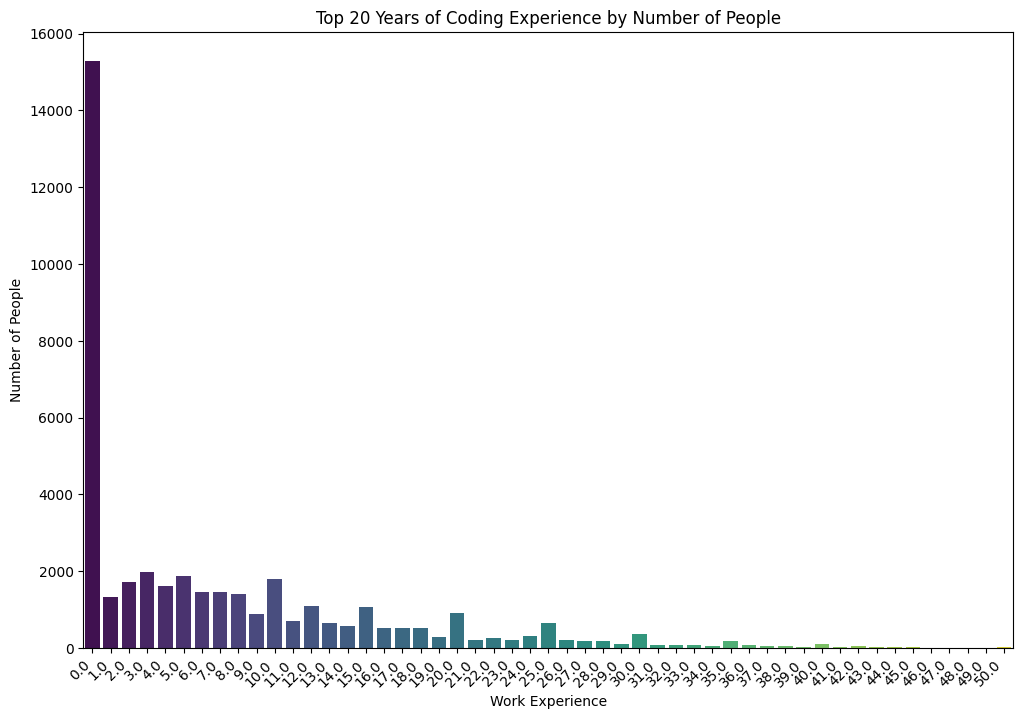

In [14]:
# Count the occurrences of each unique value in 'YearsCode' and sort them in descending order
years_code_counts = df['WorkExp'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 20 values in decreasing order
sns.barplot(x=years_code_counts.index, y=years_code_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Work Experience')
plt.ylabel('Number of People')
plt.title('Top 20 Years of Coding Experience by Number of People')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

## 4. Job Satisfaction

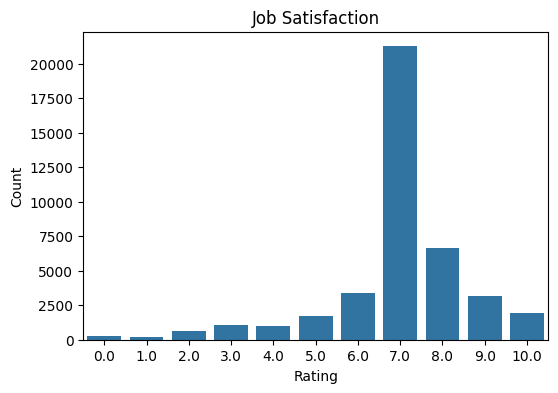

In [15]:
job_sat_counts = df['JobSat'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=job_sat_counts.index, y=job_sat_counts.values)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Job Satisfaction')

plt.show()

## 5. Employment Information

### Employment Focus

In [16]:
branch_mapping = {
    'I am a developer by profession': 'Professional Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Student'
}

# Replace the values in the 'OrgSize' column using the mapping
df['MainBranch'] = df['MainBranch'].replace(branch_mapping)

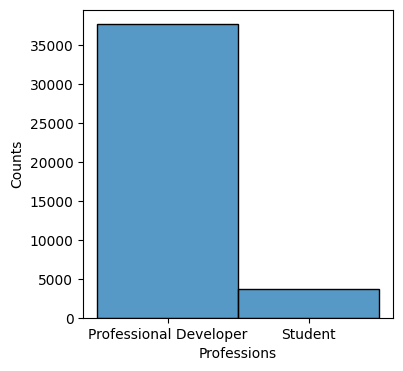

In [17]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='MainBranch')
plt.xlabel('Professions')
plt.ylabel('Counts')
# plt.xticks(rotation = 45)
plt.show()

### Type of Employment

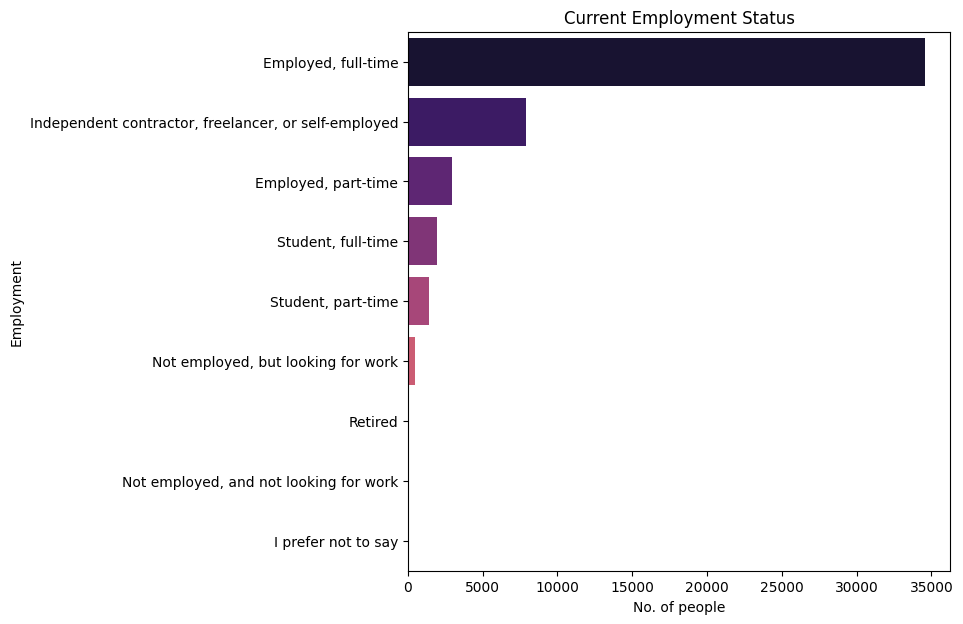

In [18]:
# Step 1: Split the options and flatten the list
option_split = df['Employment'].str.split(';').explode()

# Step 2: Count the occurences of each option
option_counts = Counter(option_split)

# Step 3: Convert to a DataFrame for easier plotting
option_df = pd.DataFrame(option_counts.items(), columns=['Employment', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top solutions by count
plt.figure(figsize=(7, 7))
sns.barplot(x='Count', y='Employment', data=option_df, palette='magma')

# Add labels and title
plt.xlabel('No. of people')
plt.ylabel('Employment')
plt.title('Current Employment Status')


plt.show()

### Remote Work

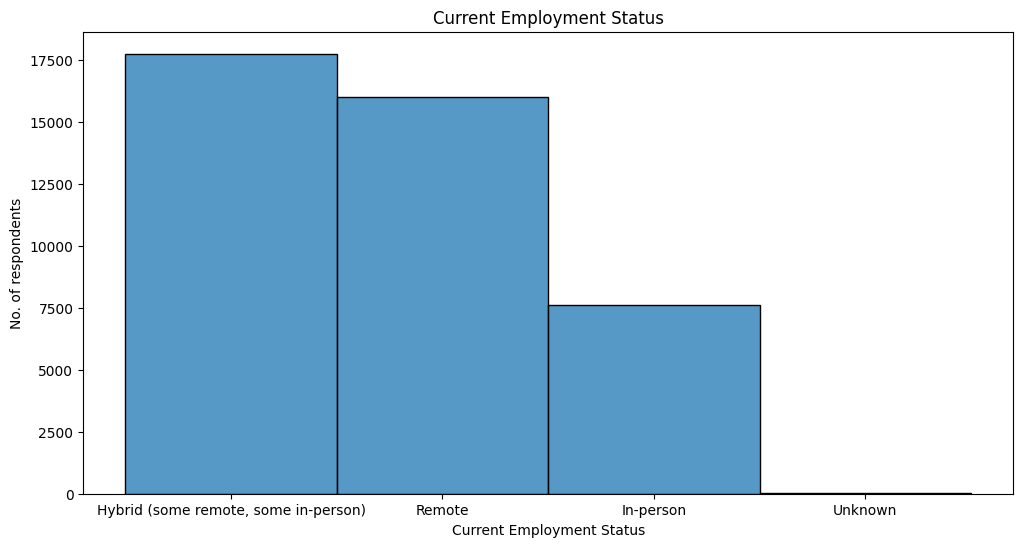

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='RemoteWork')

plt.xlabel('Current Employment Status')
plt.ylabel('No. of respondents')
plt.title('Current Employment Status')

plt.show()

## 6. Technology Used

### Languages Have Worked With

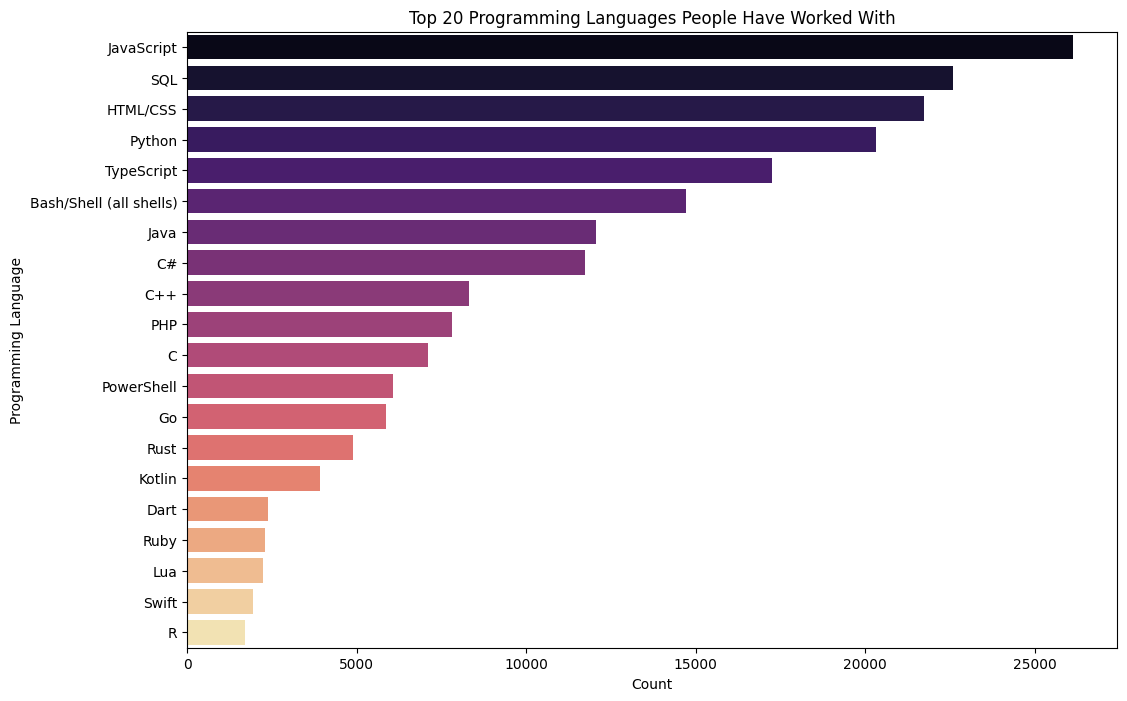

In [20]:
# Step 1: Split the languages and flatten the list
languages_split = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()

# Step 2: Count the occurrences of each language
language_counts = Counter(languages_split)

# Step 3: Convert to a DataFrame for easier plotting
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top languages by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Language', data=language_df.head(20), palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Top 20 Programming Languages People Have Worked With')

# Display the plot
plt.show()

### Language Want to Work With

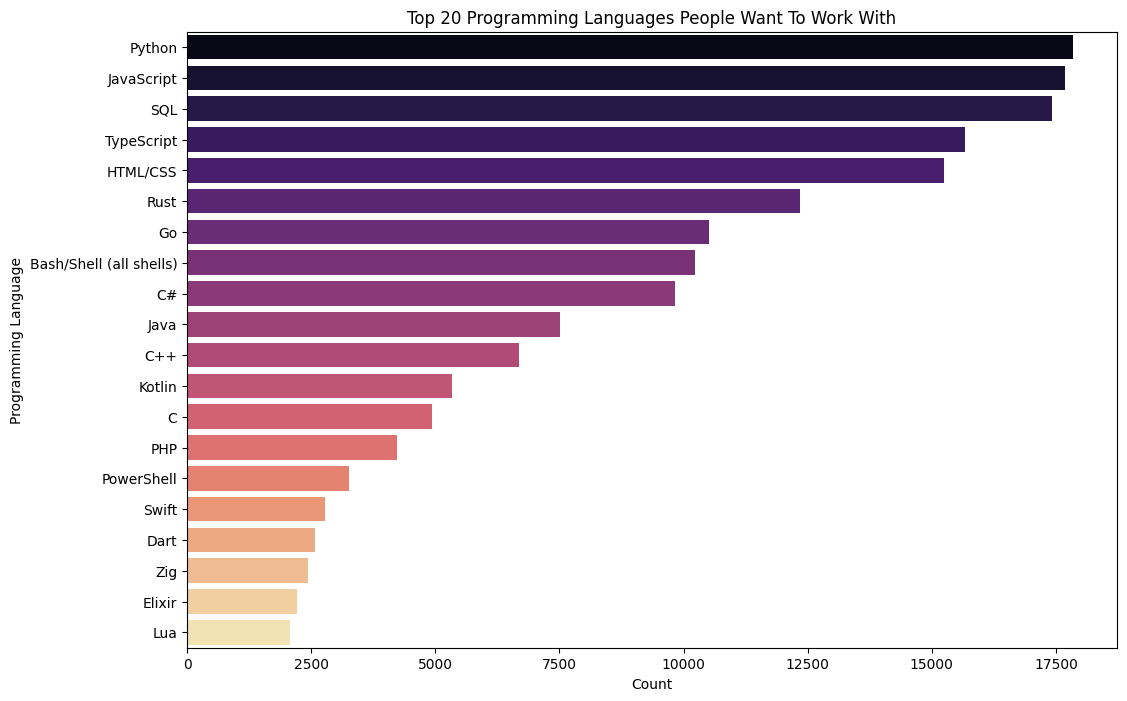

In [21]:
# Step 1: Split the languages and flatten the list
languages_split = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Step 2: Count the occurrences of each language
language_counts = Counter(languages_split)

# Step 3: Convert to a DataFrame for easier plotting
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top languages by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Language', data=language_df.head(20), palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.title('Top 20 Programming Languages People Want To Work With')

# Display the plot
plt.show()

### Platform Worked With

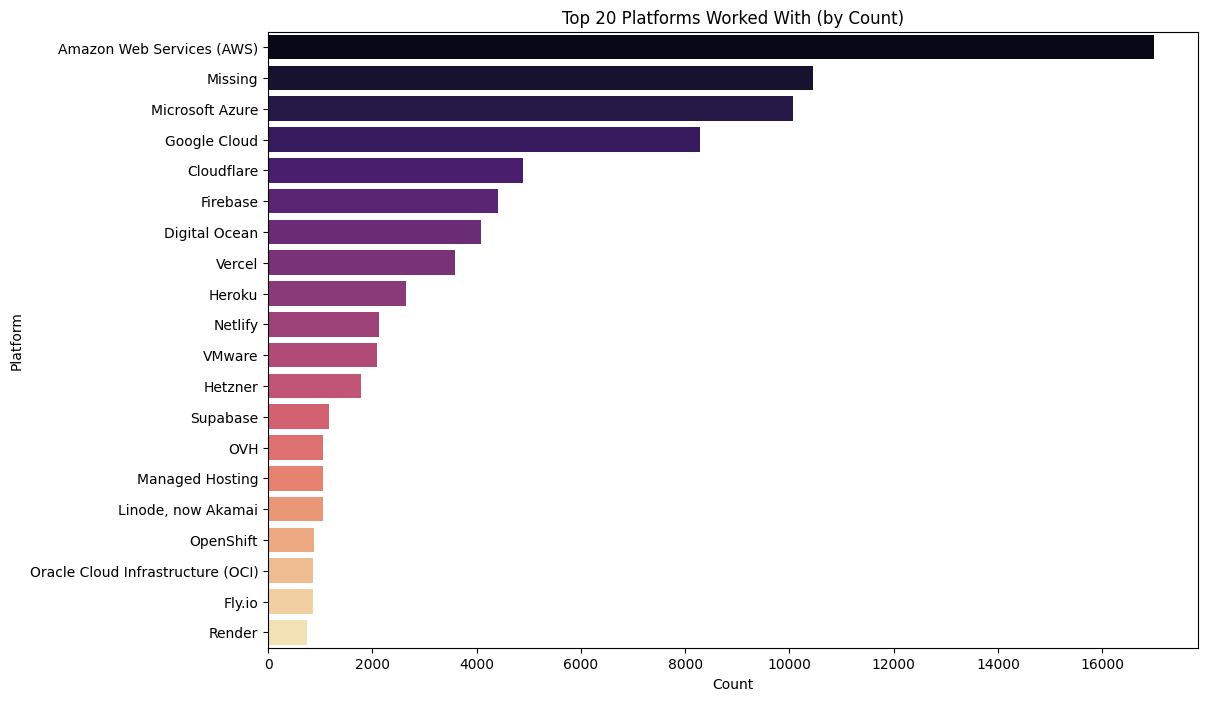

In [22]:
# Step 1: Split the languages and flatten the list
languages_split = df['PlatformHaveWorkedWith'].dropna().str.split(';').explode()

# Step 2: Count the occurrences of each language
language_counts = Counter(languages_split)

# Step 3: Convert to a DataFrame for easier plotting
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top languages by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Language', data=language_df.head(20), palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Platform')
plt.title('Top 20 Platforms Worked With (by Count)')

# Display the plot
plt.show()

### Platform Want To Work With

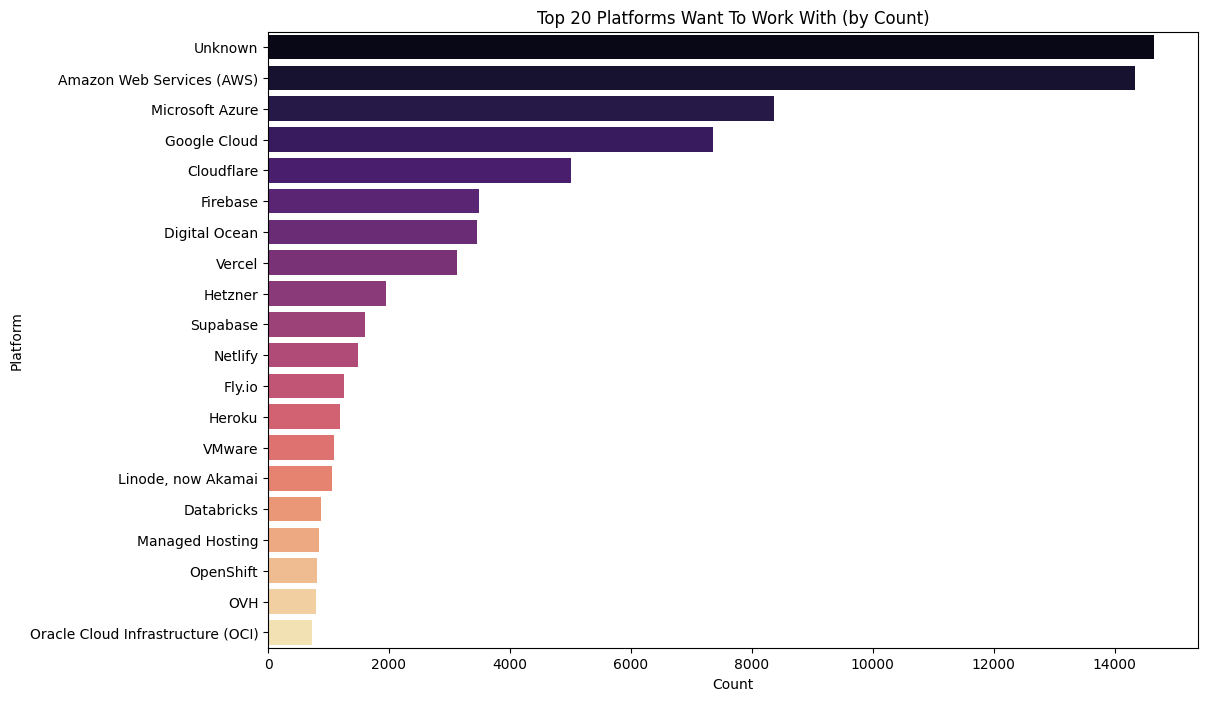

In [23]:
# Step 1: Split the languages and flatten the list
languages_split = df['PlatformWantToWorkWith'].dropna().str.split(';').explode()

# Step 2: Count the occurrences of each language
language_counts = Counter(languages_split)

# Step 3: Convert to a DataFrame for easier plotting
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top languages by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Language', data=language_df.head(20), palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Platform')
plt.title('Top 20 Platforms Want To Work With (by Count)')

# Display the plot
plt.show()

## 7. Organisational Information


### Size of the organisation

In [24]:
org_mapping = {
    "100 to 499 employees": "100-499",
    "Just me - I am a freelancer, sole proprietor, etc.": "Just me",
    "10 to 19 employees": "10-19",
    "20 to 99 employees": "20-99",
    "5,000 to 9,999 employees": "5000-9000",
    "1,000 to 4,999 employees": "1000-4999",
    "I don’t know": "Unknown",
    "10,000 or more employees": "More than 10,000",
    "2 to 9 employees": "2-9",
    "500 to 999 employees": "500-999",
}


# Replace the values in the 'OrgSize' column using the mapping
df['OrgSize'] = df['OrgSize'].replace(org_mapping)

df['OrgSize'].unique()

array(['100-499', 'Just me', '10-19', '20-99', '5000-9000', '1000-4999',
       'Unknown', 'More than 10,000', '2-9', '500-999'], dtype=object)

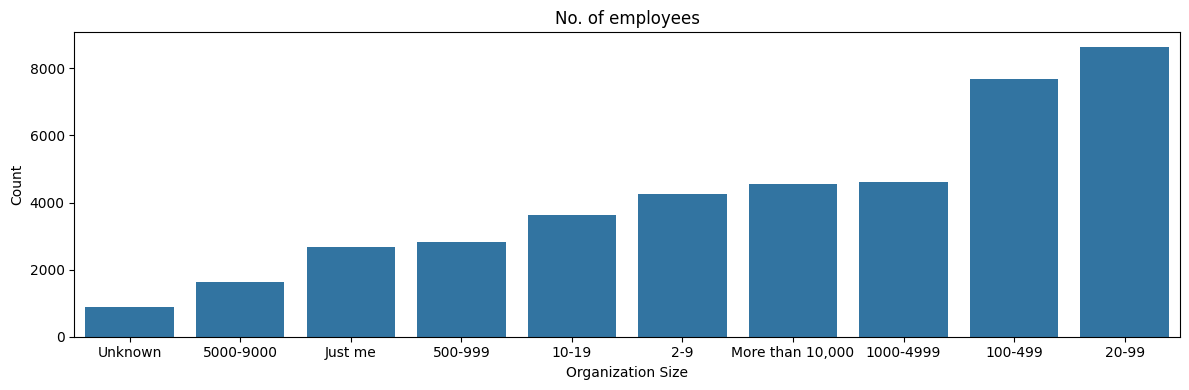

In [25]:
counts = df['OrgSize'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(12, 4))
sns.barplot(x=counts.index, y=counts.values)

plt.xlabel('Organization Size')
plt.ylabel('Count')
plt.title('No. of employees')

plt.tight_layout()

plt.show()

### Purchase Influence

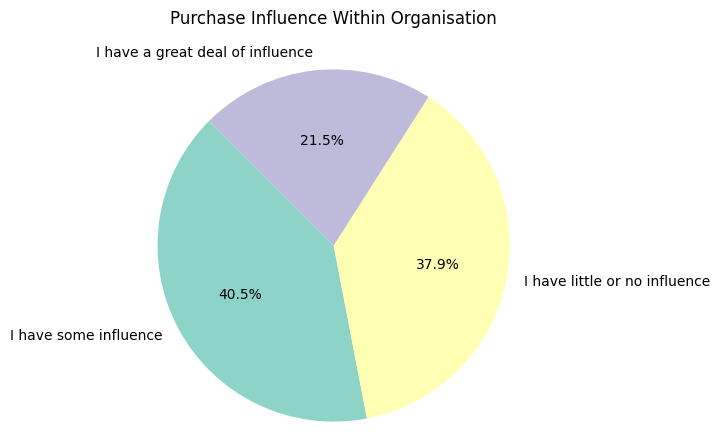

In [26]:
counts = df['PurchaseInfluence'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set3"))

plt.title('Purchase Influence Within Organisation\n')

plt.axis('equal')

plt.show()

### BuyNewTool

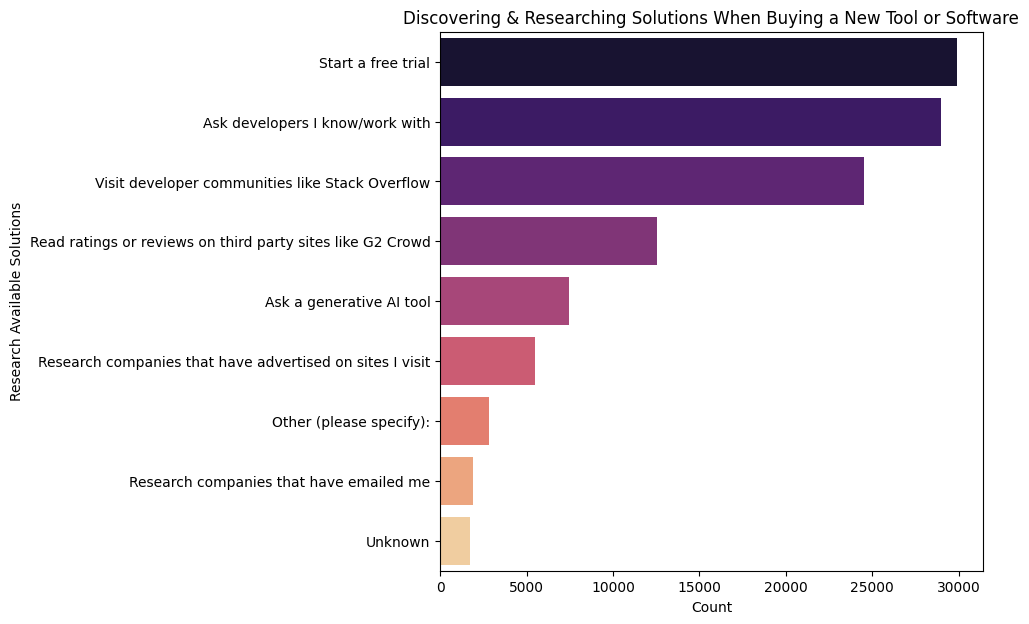

In [27]:
# Step 1: Split the options and flatten the list
option_split = df['BuyNewTool'].str.split(';').explode()

# Step 2: Count the occurences of each option
option_counts = Counter(option_split)

# Step 3: Convert to a DataFrame for easier plotting
option_df = pd.DataFrame(option_counts.items(), columns=['BuyNewTool', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top solutions by count
plt.figure(figsize=(7, 7))
sns.barplot(x='Count', y='BuyNewTool', data=option_df, palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Research Available Solutions')
plt.title('Discovering & Researching Solutions When Buying a New Tool or Software')


plt.show()

## 8. Time Related Information

Text(0.5, 1.0, 'Time spent answering questions asked at work')

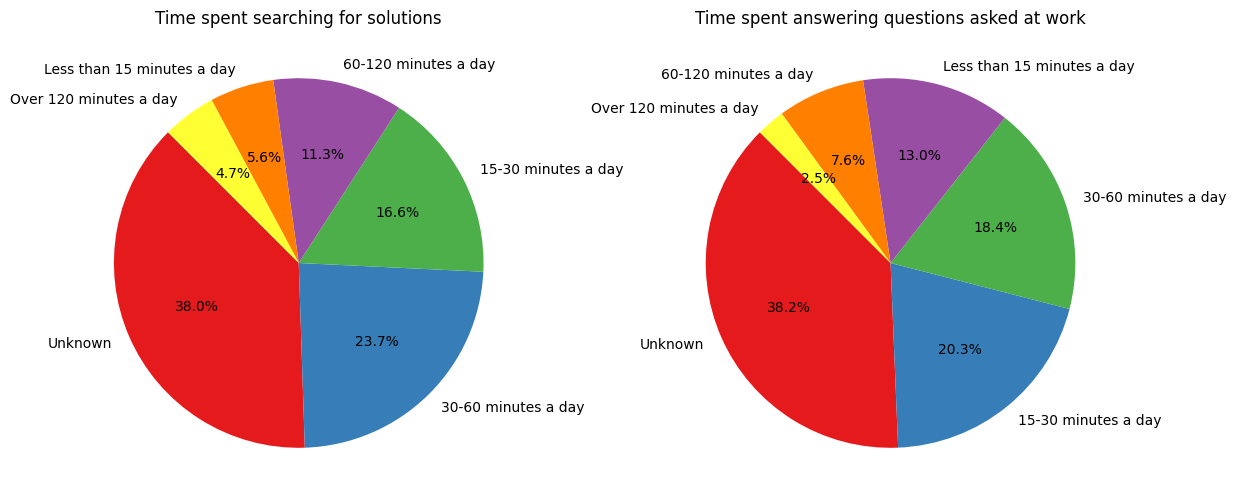

In [28]:
# data for time spent searching the answers
search_time_counts = df['TimeSearching'].value_counts()

# data for time spent answering questions 
answer_time_counts = df['TimeAnswering'].value_counts()

# Creating subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Search Time Pie Chart
axs[0].pie(search_time_counts, labels=search_time_counts.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set1"))
axs[0].set_title('Time spent searching for solutions')

# Answer Time Pie Chart
axs[1].pie(answer_time_counts, labels=answer_time_counts.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set1"))
axs[1].set_title('Time spent answering questions asked at work')


# 9. Perception about Artificial Intelligence in 2024

### AI Tools in development process

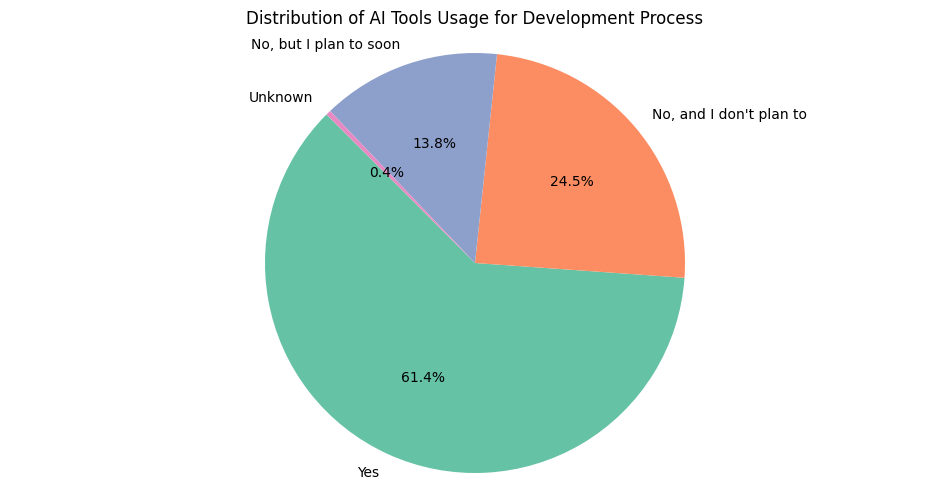

In [29]:
# Step 1: Count the unique values in the 'AISelect' column
ai_tool_counts = df['AISelect'].value_counts()

# Step 2: Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(ai_tool_counts, labels=ai_tool_counts.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Distribution of AI Tools Usage for Development Process')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### Stance on using AI for development

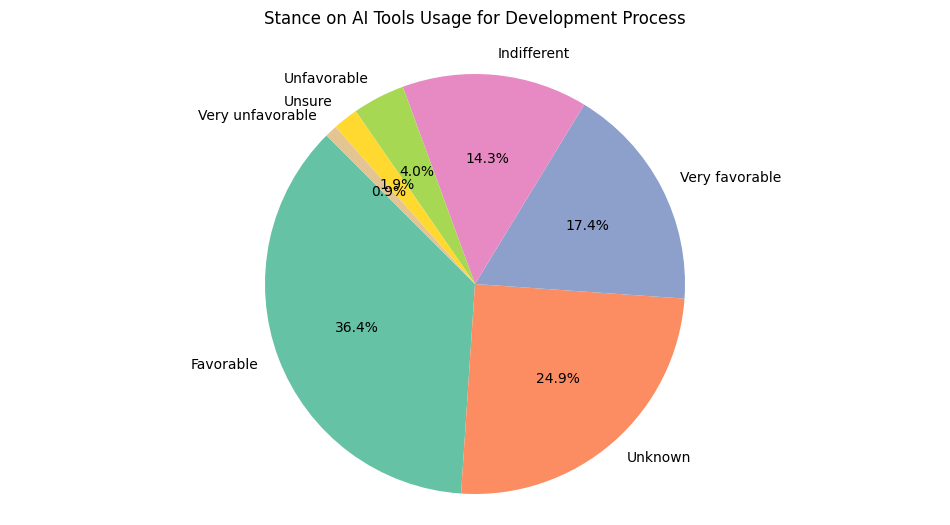

In [30]:
# Step 1: Count the unique values in the 'AISelect' column
ai_tool_counts = df['AISent'].value_counts()

# Step 2: Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(ai_tool_counts, labels=ai_tool_counts.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Stance on AI Tools Usage for Development Process\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### AIBen

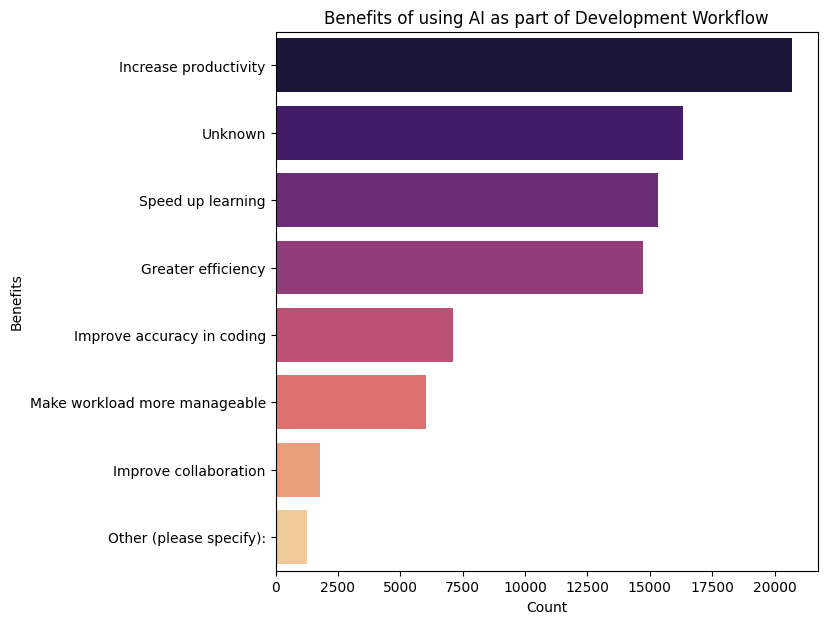

In [31]:
# Step 1: Split the options and flatten the list
option_split = df['AIBen'].str.split(';').explode()

# Step 2: Count the occurences of each option
option_counts = Counter(option_split)

# Step 3: Convert to a DataFrame for easier plotting
option_df = pd.DataFrame(option_counts.items(), columns=['AIBen', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top solutions by count
plt.figure(figsize=(7, 7))
sns.barplot(x='Count', y='AIBen', data=option_df, palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Benefits')
plt.title('Benefits of using AI as part of Development Workflow')


plt.show()

### Trust in the accuracy of the output from AI tools as part of development workflow

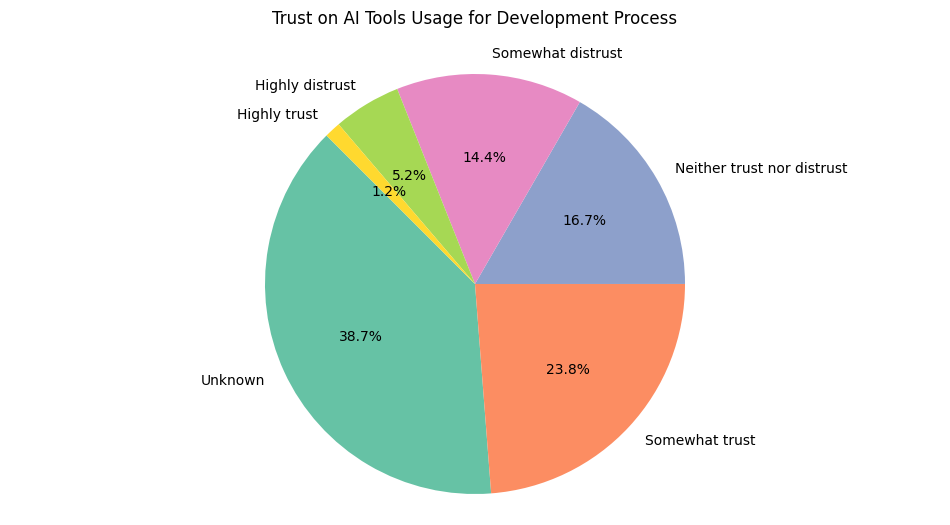

In [32]:
# Step 1: Count the unique values in the 'AISelect' column
ai_acc = df['AIAcc'].value_counts()

# Step 2: Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(ai_acc, labels=ai_acc.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Trust on AI Tools Usage for Development Process\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### Complex task handling using AI Tools

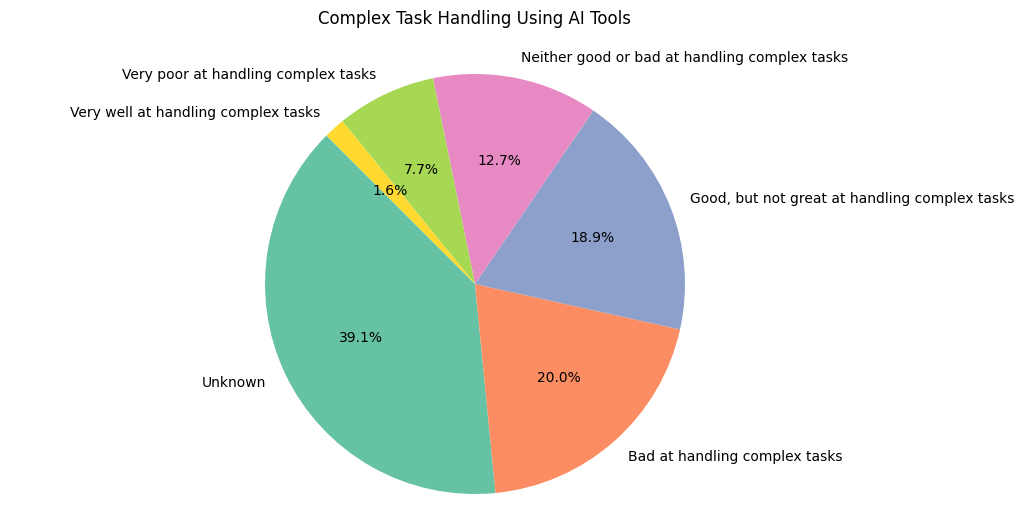

In [33]:
# Step 1: Count the unique values in the 'AISelect' column
ai_complexity = df['AIComplex'].value_counts()

# Step 2: Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(ai_complexity, labels=ai_complexity.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Complex Task Handling Using AI Tools\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### Usage of AI Tools

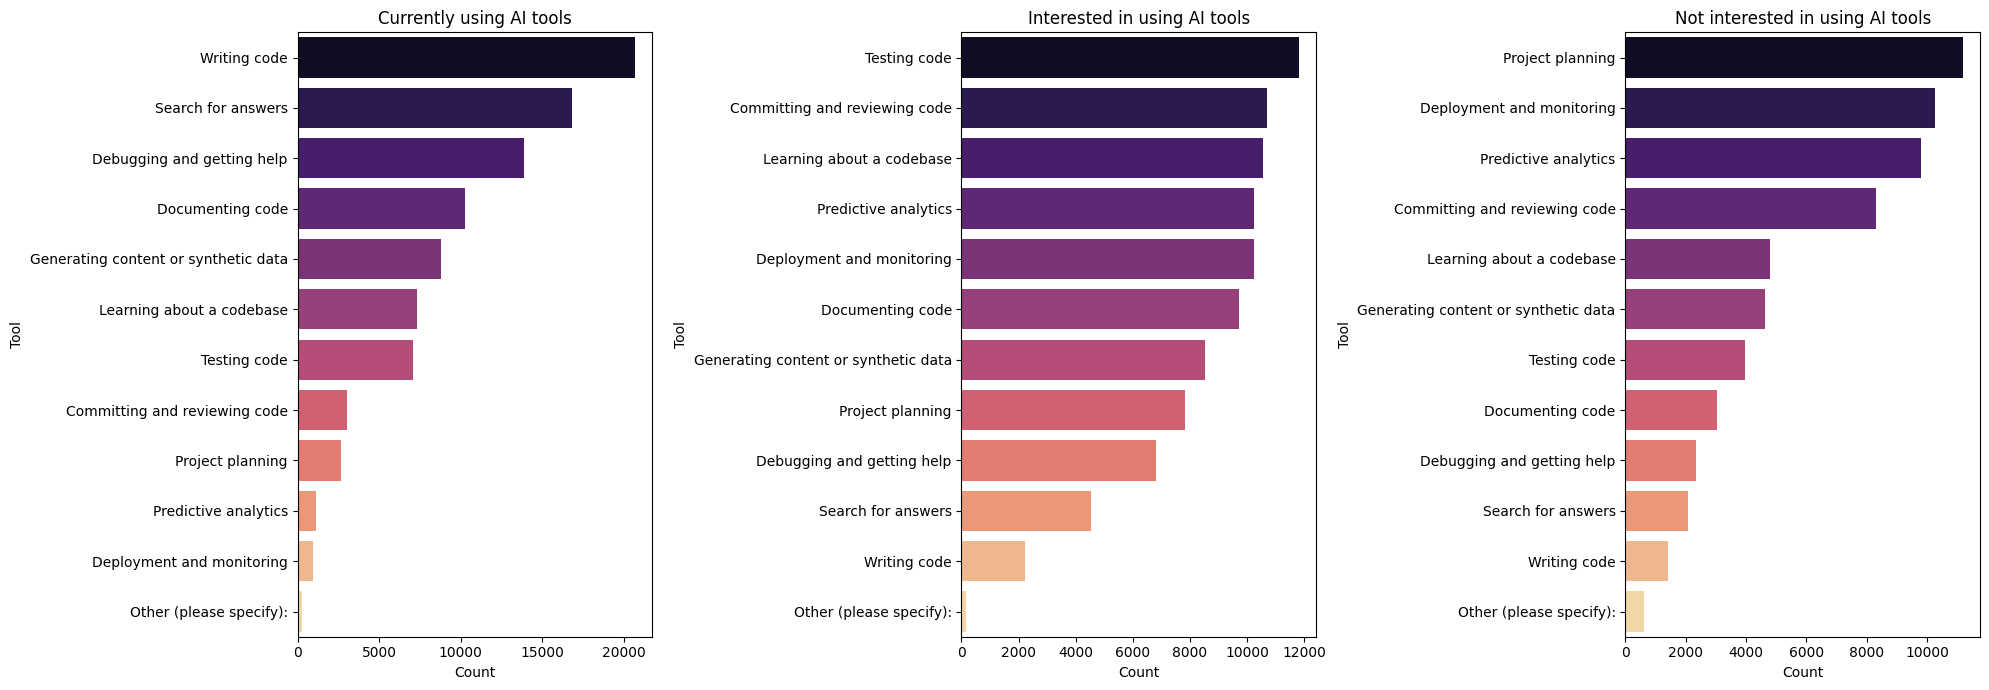

In [34]:
# Step 1: Split the options and flatten the list for all three columns
currently_using_split = df['AIToolCurrently Using'].str.split(';').explode()
interested_in_split = df['AIToolInterested in Using'].str.split(';').explode()
not_interested_in_split = df['AIToolNot interested in Using'].str.split(';').explode()

# Step 2: Count the occurrences of each option
currently_using_counts = Counter(currently_using_split)
interested_in_counts = Counter(interested_in_split)
not_interested_in_counts = Counter(not_interested_in_split)

# Step 3: Convert to DataFrames for easier plotting
currently_using_df = pd.DataFrame(currently_using_counts.items(), columns=['AITool', 'Count']).sort_values(by='Count', ascending=False)
interested_in_df = pd.DataFrame(interested_in_counts.items(), columns=['AITool', 'Count']).sort_values(by='Count', ascending=False)
not_interested_in_df = pd.DataFrame(not_interested_in_counts.items(), columns=['AITool', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 7))  # 1 row, 3 columns

# Plot 1: Currently using AI tools
sns.barplot(ax=axes[0], x='Count', y='AITool', data=currently_using_df, palette='magma')
axes[0].set_title('Currently using AI tools')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Tool')

# Plot 2: Interested in using AI tools
sns.barplot(ax=axes[1], x='Count', y='AITool', data=interested_in_df, palette='magma')
axes[1].set_title('Interested in using AI tools')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Tool')

# Plot 3: Not interested in using AI tools
sns.barplot(ax=axes[2], x='Count', y='AITool', data=not_interested_in_df, palette='magma')
axes[2].set_title('Not interested in using AI tools')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Tool')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### AI Threat

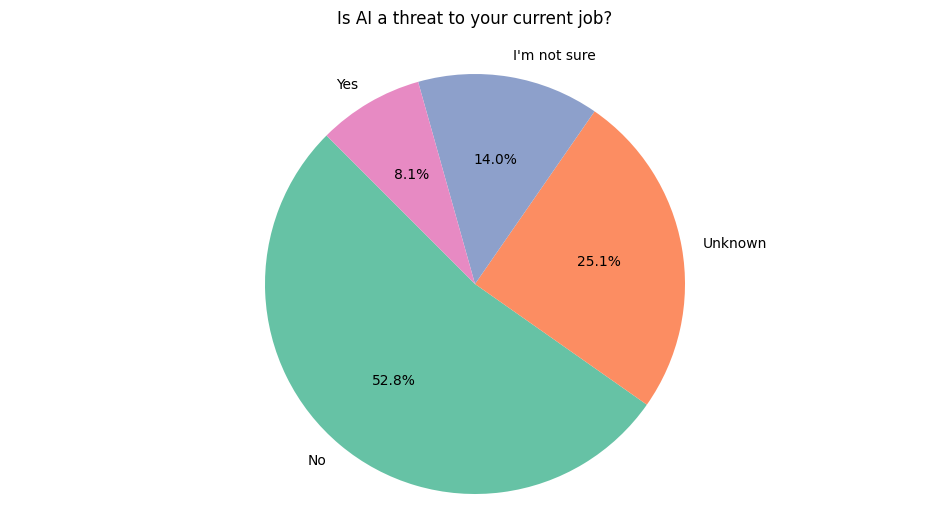

In [35]:
# Step 1: Count the unique values in the 'AISelect' column
ai_threat = df['AIThreat'].value_counts()

# Step 2: Create the pie chart
plt.figure(figsize=(12, 6))
plt.pie(ai_threat, labels=ai_threat.index, autopct='%1.1f%%', startangle=135, colors=sns.color_palette("Set2"))

# Add a title
plt.title('Is AI a threat to your current job?\n')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

### AIEthics

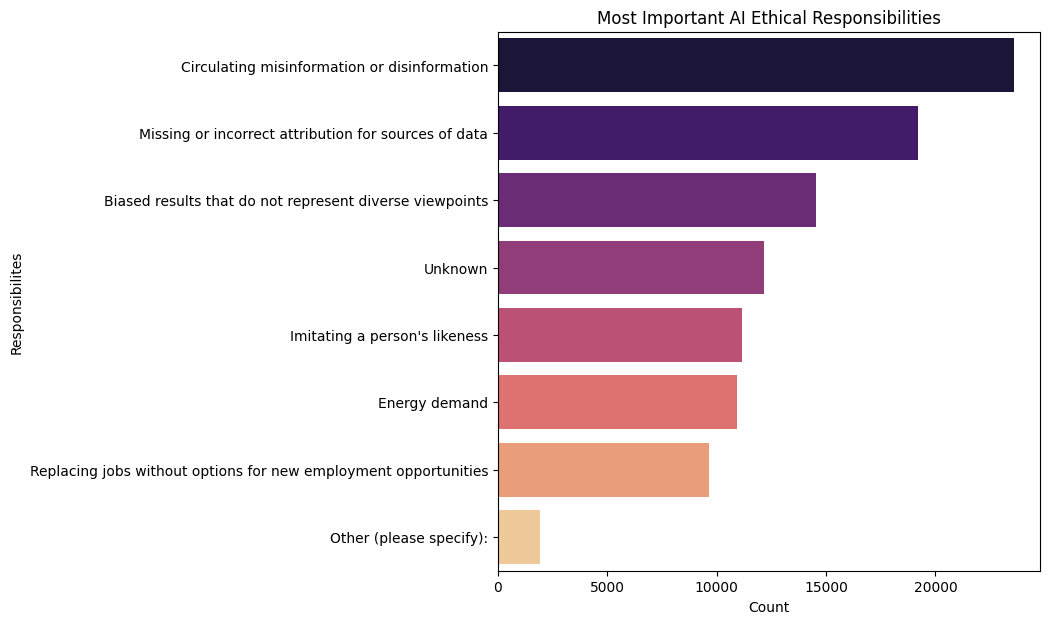

In [36]:
# Step 1: Split the options and flatten the list
option_split = df['AIEthics'].str.split(';').explode()

# Step 2: Count the occurences of each option
option_counts = Counter(option_split)

# Step 3: Convert to a DataFrame for easier plotting
option_df = pd.DataFrame(option_counts.items(), columns=['AIEthics', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top solutions by count
plt.figure(figsize=(7, 7))
sns.barplot(x='Count', y='AIEthics', data=option_df, palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Responsibilites')
plt.title('Most Important AI Ethical Responsibilities')


plt.show()

### AIChallenges

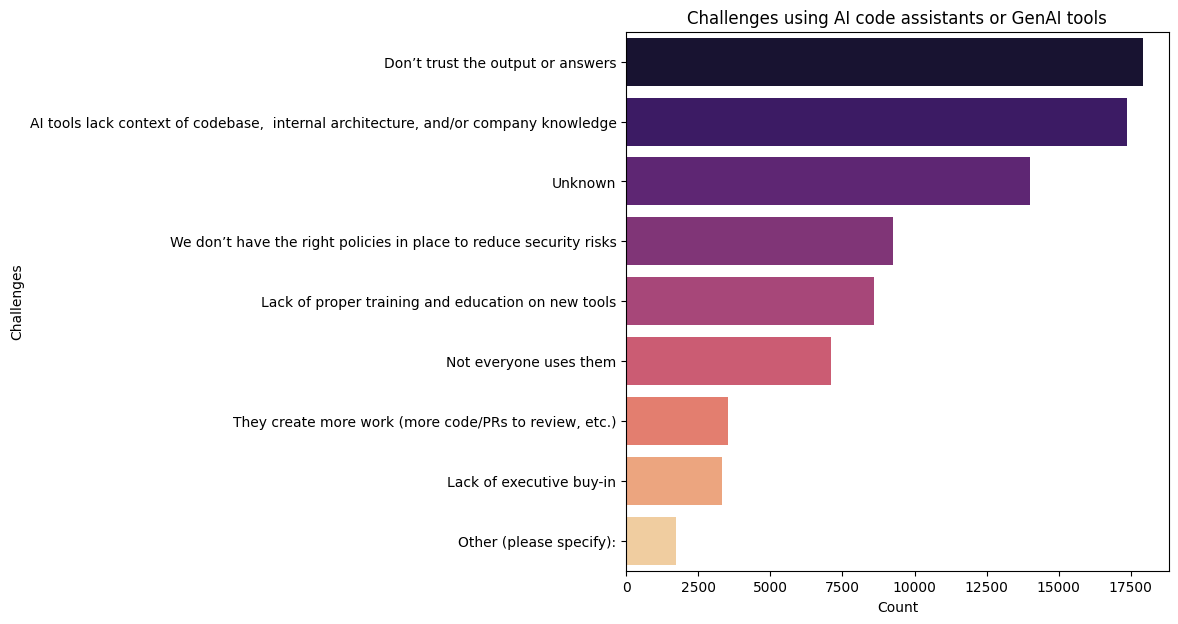

In [37]:
# Step 1: Split the options and flatten the list
option_split = df['AIChallenges'].str.split(';').explode()

# Step 2: Count the occurences of each option
option_counts = Counter(option_split)

# Step 3: Convert to a DataFrame for easier plotting
option_df = pd.DataFrame(option_counts.items(), columns=['AIChallenges', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot the top solutions by count
plt.figure(figsize=(7, 7))
sns.barplot(x='Count', y='AIChallenges', data=option_df, palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Challenges')
plt.title('Challenges using AI code assistants or GenAI tools')


plt.show()

# 10. Country
Geographical Plot to show number of respondents in each country in 2024

In [38]:
geoplot = df.groupby('Country').size()
geoplot = geoplot.to_frame('Respondents')

In [39]:
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

In [40]:
geoplot['Country'] = geoplot.index
geoplot['Country_code'] = geoplot['Country'].apply(get_country_code)

In [41]:
fig = px.choropleth(geoplot,                        
                     locations="Country_code",           
                     color="Respondents",               
                     hover_name="Country",              
                     projection="natural earth",        
                     color_continuous_scale = 'Peach',  
                     range_color=[0,10000]     
                     )        
fig.show()

In [42]:
df.to_csv('cleaned/cleaned_data2.csv', index=False)